## Load necessary libraries

In [5]:
import matplotlib.pyplot as plt # Visualize data
import numpy as np # FOR creating numerical values
import pandas as pd # FOR reading csv/txt/xlsx/xls file
# import plotly.plotly as py
from math import pi

### Load FIFA Data

In [7]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms

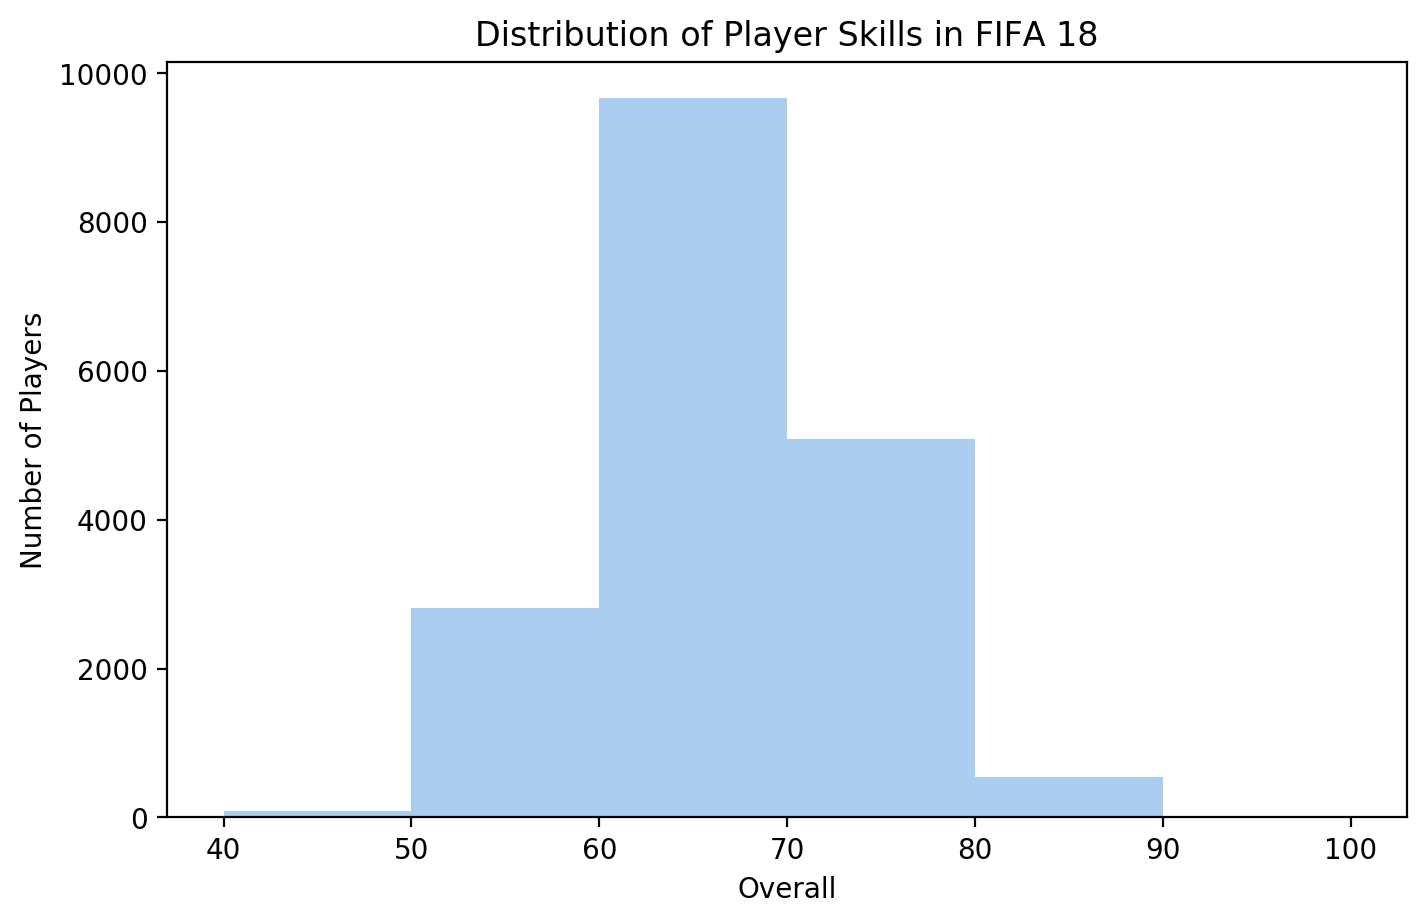

In [9]:
# bins = [0,10,20,30,40,50,60,70,80,90,100]
# OR use numpy arange
bins = np.arange(40,110,10) # 0 =>100

plt.figure(figsize=(8,5), dpi=200)

plt.hist(fifa.Overall, bins=bins, color="#abcdef")

plt.xticks(bins)

plt.ylabel("Number of Players")
plt.xlabel("Overall")
plt.title("Distribution of Player Skills in FIFA 18")

plt.show()

### Pie Charts

In [365]:
# Declare data to pass into pie
left = fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot']=='Right'].count()[0]

# Items to pass into plt.pie
slices = [left,right]
labels = ['Left','Right']
colors = ['GREY','#abcdef']

# Plot pie
py.pie(slices, labels=labels, colors=colors, autopct='%.2f %%')

py.title('Preferred Foot of FIFA Players')

py.show()

NameError: name 'py' is not defined

In [ ]:
# Easy way to strip 'lbs' in fifa.Weight column
# fifa.Weight = fifa.Weight.str.strip('lbs')

# Tutorial way to strip
# fifa.Weight = [x.strip('lbs') if type(x)==str else x for x in fifa.Weight]

## Convert Weight to integer
# fifa.Weight = [int(x) if type(x)==str else x for x in fifa.Weight]

## Convert weight to kilogram
# fifa.Weight = [ x/2.205 for x in fifa.Weight ]

# Round weight to 1 decimal point
# fifa.Weight = [round(x, 1) for x in fifa.Weight ]

# Declare data to pass into pie
light = fifa.loc[fifa.Weight < 60].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 60) & (fifa.Weight < 70)].count()[0]
medium = fifa.loc[(fifa.Weight >= 70) & (fifa.Weight < 80)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 80) & (fifa.Weight < 90)].count()[0]
heavy = fifa.loc[(fifa.Weight >= 90)].count()[0]

# Item to pass in plt.pie
weight = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 60', '60-70', '70-80', '80-90', 'Above 90']
explode = (0.5,0.1,0.1,0.1,0.5)

# Plot pie

# To use different style
plt.style.use('ggplot')

plt.pie(weight, labels=labels, labeldistance=1.05, autopct='%.f%%', pctdistance=0.8, explode=explode, radius=2)

# plt.title('FIFA players weight category (kilogram)')

plt.show()

### Box & Whisker Chart

In [ ]:
# For more style refer below URL
'''https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html?highlight=style'''

plt.style.use('seaborn')

plt.figure(figsize=(6,8))

barca = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
real = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
mu = fifa.loc[fifa.Club == 'Manchester United']['Overall']

team = [barca,real,mu]
labels = ['FC Barcelona', 'Real Madrid','Manchester United']

boxplot1 = plt.boxplot(team,
                     vert=True,  # vertical box alignment
                     patch_artist=True,
                     labels = labels)

# Fill with colors
colors = ['#7a0a57', 'white', 'red']
for bplot in [boxplot1]:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
        
plt.title('Professional Football Comparison')
plt.ylabel('Team Overall Rating')

plt.show()

### Radar Chart

#### Data Prep

In [310]:
# fifa.set_index("Name", inplace=True)
# striker.set_index("Name")

striker = fifa[['Finishing', 'Acceleration', 'Agility', 'Balance', 'BallControl', 'Jumping', 'Reactions', 'Dribbling']]
midfielder = fifa[['Crossing', 'LongPassing', 'SprintSpeed', 'Strength', 'Stamina', 'Positioning', 'ShotPower', 'Curve']]
defender = fifa[['Marking', 'Aggression', 'Interceptions', 'StandingTackle', 'SlidingTackle', 'Vision', 'Strength', 'Stamina']]

# striker.loc['L. Messi']
# striker.loc['E. Hazard']

# df = striker.loc[['L. Messi','E. Hazard']]
# df

## Down here are list of players to compare

# List of Best Striker
# striker.sort_values(by=list(striker.columns),ascending=False)
# List of Best MidFielder
# midfielder.sort_values(by=list(midfielder.columns),ascending=False)
# List of Best Defender
# defender.sort_values(by=list(defender.columns),ascending=False)

#### Plotting Radar Chart

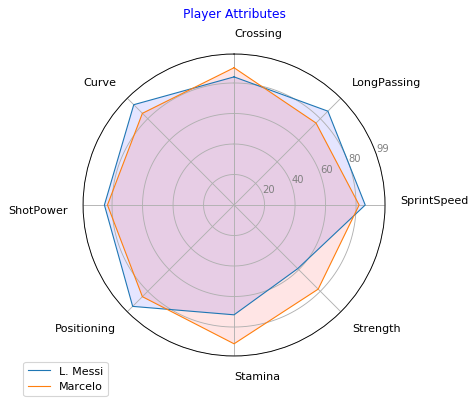

In [361]:
## Refer URL below for more
'''https://python-graph-gallery.com/391-radar-chart-with-several-individuals/'''

## Set Position & Player Name to compare 
# test = striker.loc[['L. Messi','Marcelo']]
test = midfielder.loc[['L. Messi','Marcelo']]
# test = defender.loc[['L. Messi','Marcelo']]

## number of variable
categories=list(test)[0:]
N = len(categories)

plt.figure(figsize=(5,5), dpi=80)

## # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# # Initialise the spider plot
radar = plt.subplot(111, polar=True)
 
# # If you want the first axis to be on top:
radar.set_theta_offset(pi / 2)
radar.set_theta_direction(-1)
 
# # # Draw one axe per variable + add labels labels yet
# plt.xticks(angles[:-1], categories, size=12)


# Draw one axe per variable + add labels labels yet
# idea is to add both vertical and horizontal alignment as a function of pi

plt.xticks(angles, categories)
for label,i in zip(radar.get_xticklabels(),range(0,len(angles))):

    angle_rad=angles[i]
    if angle_rad <= pi/2:
        ha= 'left'
        va= "bottom"
        angle_text=angle_rad*(-180/pi)+90
    elif pi/2 < angle_rad <= pi:
        ha= 'left'
        va= "top"
        angle_text=angle_rad*(-180/pi)+90
    elif pi < angle_rad <= (3*pi/2):
        ha= 'right'
        va= "top"  
        angle_text=angle_rad*(-180/pi)-90
    else:
        ha= 'right'
        va= "bottom"
        angle_text=angle_rad*(-180/pi)-90
    label.set_rotation(angle_text)
    label.set_verticalalignment(va)
    label.set_horizontalalignment(ha)

    
# # Draw ylabels
radar.set_rlabel_position(70)
plt.yticks([20,40,60,80,99], ["20","40","60","80","99"], color="grey", size=9)
plt.ylim(0,99)

# Title

title="Player Attributes"
plt.title(title, size=11, color='Blue', y=1.1)

 
    
# # Player 1
values=test.iloc[0].values.flatten().tolist()
values += values[:1]
radar.plot(angles, values, linewidth=1, linestyle='solid', label=test.index[0])
radar.fill(angles, values, 'b', alpha=0.1)
 
# # Player 2
values=test.iloc[1].values.flatten().tolist()
values += values[:1]
radar.plot(angles, values, linewidth=1, linestyle='solid', label=test.index[1])
radar.fill(angles, values, 'r', alpha=0.1)
 
# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0))

plt.show()
